# 第4章 因果推論高度化のための機械学習

## 4.1 因果推論に機械学習を使用するメリット

1. クロスバリデーション(交差検証)やグリッドサーチなど、自動化された手順でモデル選択が可能
2. 膨大な共変量を考慮することで、観測対象に対する識別仮定の妥当性が向上

   具体的には以下の２つの推定の妥当性が向上する
   1. CATEやITEを考慮した因果効果の推定
   2. 非線形データに対応した推定

## 4.2 機械学習の全体像

### 4.2.1 機械学習の種類

1. 教師あり学習: 説明変数と目的変数の両方があるデータからパターンを学習し、説明変数から、目的変数を予測する
2. 教師なし学習: 目的変数がないデータのみを学習し、データのパターンを学習し推測
3. 半教師あり学習: 教師あり、なしの組み合わせで、目的変数があるデータだけでなく、目的変数が無いデータについてもモデルの学習に利用
4. 強化学習: 周囲の環境を学習し、どの用に行動すべきか学習。設定された報酬によってフィードバックを得る

### 4.2.2 教師あり学習の実行フロー

Step

1. データの理解
2. 前処理
3. モデル構築
4. 精度検証、チューニング
5. 解釈

### 4.2.3 回帰

![図4.3](images/chap4/image.png)

回帰とは、予測値と実測値の差を縮めること。その差を評価するときに汎化誤差(学習データからの予測と、テストデータからの実測値の差)を使う。

* 平均二乗誤差 (Mean Squared Error: MSE)

  $$
  \mathrm{MSE} = E[(y - \hat{f} (x))^2]
  $$

  ここで、

  $$
  \begin{align}
  E[(y - \hat{f} (x))^2] &= (Bias [{\hat{f}} (x)])^2 + Var[{\hat{f}}(x)] + \sigma^2 \\
  Bias[\hat{f}(x)] &= E[\hat{f}(x) - f(x)] \\
  Var[\hat{f}(x)] &= E[(\hat{f}(x) - E[\hat{f}(x)])^2]
  \end{align}
  $$

  * バイアス(Bias)
    
    モデルの予測平均値と実測値の間の近似誤差。モデルの仮定の誤りに由来する。
  * 
  * 分散(Variance)
    モデルの予測値がどれだけ予測の平均値からばらついているか。過学習により生じる

### 4.2.4 分類

回帰と同様に誤差(誤分類)を最小化する問題。どの用にデータ同士の境界線を引くか

* 線形分類器: サポートベクトルマシン(SVM)など
* 非線形分類器

### 4.2.5 回帰と分類問題を解くための決定木モデル

決定木モデル: データのパターンを捉えるために条件分岐を用いるモデル。回帰、分類の両方で使用可能

### 4.2.6 アンサンブル学習

複数の異なる機械学習モデルを組み合わせて、精度を上げる手法。下記のバギングとブースティングは第5章で用いる

1. バギング(Bagging)
   
   ートストラップサンプリング(重複を許容してランダムサンプリング)したサブセットデータに対して、異なる弱学習器を適用して並列に学習させる。予測値の分散を減らせることが特徴。最終的な予測値は、回帰の場合は平均、分類の場合は多数決などで決める。分散を減らす
2. ブースティング
   
   データに対し、直列で学習させ、残差を計算する。前の弱学習器で間違って分類されたデータの残差が小さくなるように(次の学習機で正しく分類されるように)重み付けされる。最終的にすべての弱学習器の予測値を組み合わせて結果を出す。バイアスを減らす

## 4.3 代表的な精度検証指標

### 4.3.1 回帰問題で使用する指標

* 誤差率: MAPE(Mean Absolute Percentage Error: 平均絶対誤差率)

  $$
  MAPE = \frac{100}{n} \sum_{i=1}^n \left| \frac{\hat{f}(x_i) - y_i}{y_i} \right|
  $$
* 誤差の大きさ

  * MAE(Mean Absolute Error) はずれ値にペナルティ(誤差の二乗)を設定しない場合につかう

    $$
    MAE = \frac{1}{n} \sum_{i=1}^{n} \left|\hat{f}(x_i) - y_i \right|
    $$
  * MSE(Mean Squared Error: 平均二乗誤差) 誤差を二乗するのではずれ値に敏感

    $$
    MSE = \frac{1}{n} \sum_{i=1}^{n} \left(\hat{f}(x_{i}) - y_i\right)^2
    $$
  * RMSE(Root Mean Squared Error: 平均二乗誤差の平方根) MSEと比べ、単位が元データと同じなので誤差の大きさを理解しやすい

    $$
    RMSE = \sqrt{MSE}
    $$
* その他

  * 決定係数: $R^2$: 線形モデルの予測値と実測値の関連性の指標。1に近いほどよいが過学習に注意

    $$
    R^2
    = 1
    - \frac{ \displaystyle{\sum_{i=1}^n} ( y_i -\hat{f} (x_i) )^2}
      { \displaystyle{\sum_{i=1}^n} (y_i - \overline{y})^2 }
    $$
  * 自由度調整済み$R^2$: $R^2$の分子・分母をそれぞれ自由度でで割ったもの。kは説明変数の数なので、予測に不必要な説明変数が多いほど小さくなる

    $$
    R_k^{*2}
    = 1
    - \frac{
          \frac{ \displaystyle{\sum_{i=1}^n} (y_i - \hat{f}(x_i))^2 }
          { n - k - 1 }
    }{
          \frac{ \displaystyle{\sum_{i=1}^n} (y_i - \bar{y})^2 }
          { n - 1 }
    }
    $$

### 4.3.2 二値分類問題で使用する指標

二値分類問題では正例と負例を設定する

糖尿病患者の分類を例にとると、糖尿病患者が正例、そうでない人が負例となる

* 混同行列

  |                        | 実際の結果<br />Positive          | 実際の結果<br />Negative          |
  | ---------------------- | --------------------------------- | --------------------------------- |
  | 予測結果<br />Positive | 1. 真陽性<br />True Positive(TP)  | 2. 偽陽性<br />False Positive(FP) |
  | 予測結果<br />Negative | 3. 偽陰性<br />False Negative(FN) | 4. 真陰性<br />True Negative(TN)  |

* しきい値(カットオフ値)固定あり

  * 正例と負例の両方が重要: 正解率(Accuracy) 正しく分類された正例(TP) + 正しく分類された負例(TF)の割合

    $$
    \frac{TP + TN}{TP + FP + FN + TN}
    $$
  * 重要でない:

    * 少数でも良いので正確に正例を分類したい: 適合率(Precision) 正例と判定されたもののうち(TP + FP)、判定が正しいもの(TP)の割合

      $$
      \frac{TP}{TP + FP}
      $$
    * 取りこぼしなく正例を抽出したい: 再現率(Recall) 実際は正例であるもの(TP + FN)のうち、正しく正例(TP)と判定された割合

      $$
      \frac{TP}{TP + FN}
      $$
    * 適合率も再現率も重要: F1 score 適合率と再現率の調和平均。適合率も再現率も重視するときに使う

      $$
      2 \times \frac{適合率\times 再現率}{適合率 + 再現率}
      $$
* しきい値(カットオフ値)固定なし
  
  この場合、予測の際にしきい値を変動させて精度検証する

  AUC(Area under Curve): 横軸がしきい値の変動、縦軸が精度のグラフを作り、グラフの積分値で評価する

  * 不均衡データ: PR-AUC
  * 均衡データ: ROC-AUC

## 4.4 演習: AutoMLによる高速実装
### 4.4.1 AutoMLとは

機械学習に必要な一連のプロセスを自動化するツール・ライブラリ
* FLAML
* Ludwig
* PyCaret(今回使用する)

など

### 4.4.2 前処理 -モデル構築前のデータを効率的に処理-

主な前処理
* 欠陥値補完: 平均値、中央値、最頻値、KNN(K近傍)、指定した値による補完
* エンコーディング: One-Hotエンコーディング
* 外れ値除去: IdolationForest
* 不均衡データへの対応: SMOTE
* スケーリング: 標準化、正規化
* 特徴量作成: 多項式特徴量
* 特徴量選択: 多重共線性への対応、主成分分析

### 4.4.3 回帰

問題設定: 新規顧客が加入する場合の保険料はいくらになるか?(保険料予測モデルの構築)

#### Step 1 ライブラリの準備、データの確認

In [1]:
from pycaret.datasets import get_data

data = get_data("insurance")
# children: 子どもの人数.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Step 2 前処理

目的変数(target)は"charges"とする

In [2]:
from pycaret.regression import setup

reg1 = setup(data, target="charges", session_id=1)

,Description,Value
0,Session id,1
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


#### Step 3 推定(モデル構築)、Step 4 結果の評価

In [3]:
from pycaret.regression import compare_models

best_model = compare_models(fold=5)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:17:50
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2673.1328,22831352.1488,4757.6595,0.8428,0.4616,0.3314,0.0220
lightgbm,Light Gradient Boosting Machine,2988.7787,24864294.8687,4967.4365,0.8293,0.5511,0.3779,0.2220
rf,Random Forest Regressor,2811.4850,25145455.9262,5005.3493,0.8277,0.4863,0.3442,0.0440
et,Extra Trees Regressor,2807.5656,27657139.9361,5243.4199,0.8105,0.4980,0.3370,0.0340
ada,AdaBoost Regressor,4236.3433,28698756.2206,5349.6735,0.8024,0.6369,0.7334,0.0120
ridge,Ridge Regression,4228.8245,37431332.8470,6110.1951,0.7451,0.5777,0.4335,0.2560
br,Bayesian Ridge,4221.0785,37430268.0274,6110.1304,0.7451,0.5802,0.4322,0.0180
lar,Least Angle Regression,4212.7467,37428161.4425,6109.9838,0.7450,0.5844,0.4308,0.0100
llar,Lasso Least Angle Regression,4213.0970,37428023.0516,6109.9811,0.7450,0.5831,0.4309,0.0100
lasso,Lasso Regression,4213.1033,37428053.8905,6109.9835,0.7450,0.5831,0.4309,0.2820


In [4]:
# モデル作成
from pycaret.regression import create_model

lgbm = create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3658.0607,42817541.4594,6543.5114,0.7343,0.8272,0.3316
1,3149.9044,24677350.7871,4967.6303,0.8096,0.6872,0.4568
2,2103.4995,12986349.8080,3603.6578,0.9134,0.4404,0.3756
3,3203.9936,22865360.4962,4781.7738,0.8325,0.5064,0.3991
4,3245.7093,28574381.5072,5345.5011,0.7999,0.5412,0.3622
5,2799.5245,19181370.3695,4379.6541,0.8514,0.4434,0.3238
6,3017.7155,24535271.8343,4953.3092,0.8160,0.5891,0.3732
7,3302.8236,32669789.7628,5715.7493,0.7581,0.5073,0.3925
8,2790.8908,24454782.4357,4945.1777,0.8694,0.5189,0.3151


In [5]:
# ハイパーパラメーターのチューニング
from pycaret.regression import tune_model

tuned_lgbm = tune_model(lgbm, n_iter=5, optimize="RMSE")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3837.4940,40165464.9217,6337.6230,0.7507,0.5486,0.4123
1,2874.7081,20864712.2589,4567.7907,0.8390,0.5086,0.4042
2,2136.6788,12526594.0238,3539.2929,0.9165,0.3990,0.3759
3,2788.1336,20673979.6920,4546.8648,0.8486,0.4732,0.3891
4,2911.6540,26300556.4047,5128.4068,0.8158,0.4581,0.3252
5,2462.2218,17790226.5977,4217.8462,0.8622,0.4039,0.2908
6,2765.6913,20608981.1578,4539.7116,0.8454,0.4149,0.3275
7,3020.5501,28637881.9580,5351.4374,0.7879,0.4762,0.3667
8,2831.1943,24004617.8429,4899.4508,0.8718,0.5161,0.3821


Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [6]:
# チューニングしたハイパーパラメーターの確認
tuned_lgbm

LGBMRegressor(bagging_fraction=0.5, bagging_freq=7, feature_fraction=0.5,
              learning_rate=0.05, min_child_samples=1, min_split_gain=0.5,
              n_estimators=120, n_jobs=-1, num_leaves=4, random_state=1,
              reg_alpha=10, reg_lambda=0.05)

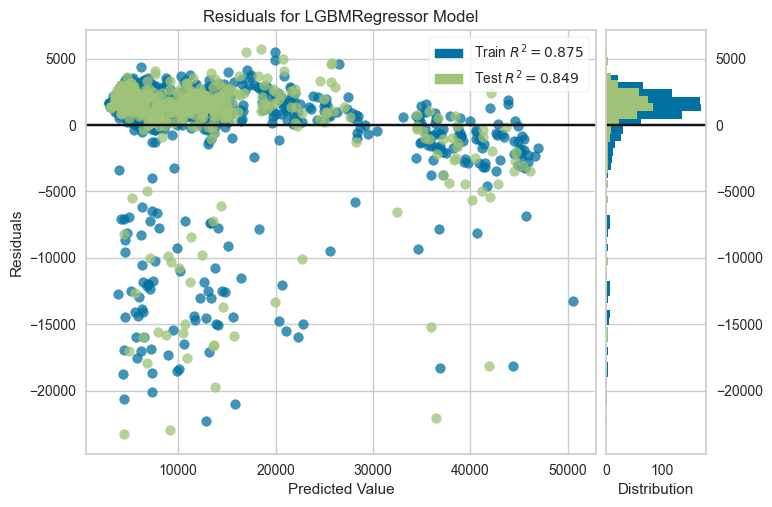

In [7]:
# 残差をプロットして確認
from pycaret.regression import plot_model

# 横軸が予測値、縦軸が残差、右に分布を示すヒストグラムが表示される
# 保険料30,000ドル以下では、訓練データ、予測データともに残差が大きい事がわかる
plot_model(tuned_lgbm)

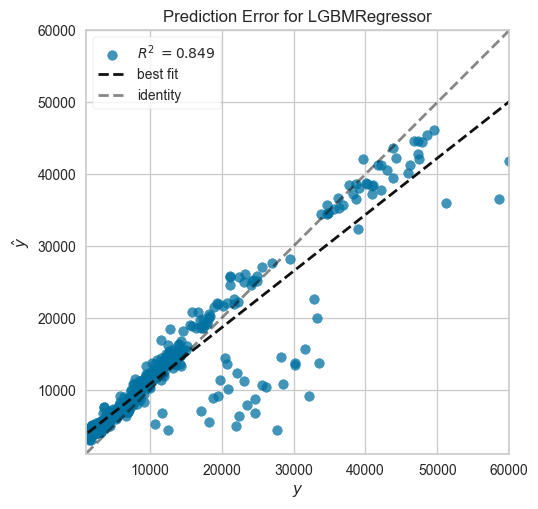

In [8]:
# 縦軸: 予測値、横軸: 実測値の散布図を表示
plot_model(tuned_lgbm, plot="error")

# 予測値が20,000ドル以下では、実測値が高く出ているケースが多い

#### Step 5 モデルの解釈
SHAP(SHapley Additive exPlanations): モデルが出した予測の理由を説明するための方法の1つ。平均的な予測値に対して、各変数の貢献度を分解して示す。

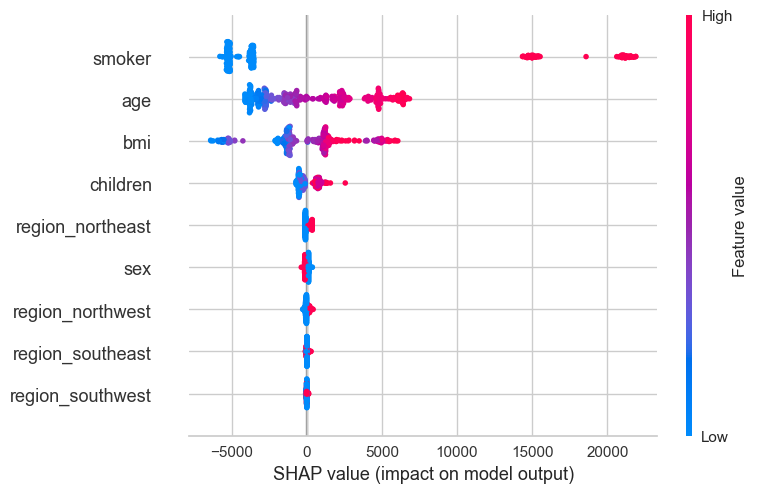

In [9]:
from pycaret.regression import interpret_model

interpret_model(tuned_lgbm)

# 縦軸に重要度順の説明変数
# 横軸にSHAP値(目的変数に対して影響を与える数値).
# グラデーションはその説明変数の値の大小を示す(赤が大きい).
# smokerだと保険料が上がる可能性が高いことが読み取れる

In [10]:
# 個々のサンプルに対して、説明変数の寄与度を示す
interpret_model(tuned_lgbm, plot="reason", observation=1)  # 1番目のサンプル

# 保険料の予測値は12,933.35ドル
# age=57が保険料を押し上げ、smoker=0が保険料を押し下げていることがわかる


SHAPのように特徴量が予測にどう影響を与えるかを理解することが重要だが、深層学習などの複雑なモデルでは難しい。直感的に解釈できるように研究が進んでいる。

### 4.4.4 分類

問題設定: 糖尿病の可能性が高い人は誰か?(糖尿病予測モデルの構築)

#### Step 1 ライブラリの準備、データの確認

In [11]:
from pycaret.datasets import get_data

data = get_data("diabetes")

# データの説明
# Number of times pregnant: 妊娠回数
# Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# 経口ブドウ糖負荷試験2時間後の血漿グルコース濃度
# Diastolic blood pressure: 拡張期血圧(mm Hg)
# Triceps skin fold thickness: 三頭筋皮膚脂肪厚(mm)
# 2-Hoiur serum insulin: 2時間血清インスリン(mu U/ml)
# Body mass index: BMI
# Diabetes pedigree function: 糖尿病の家族歴などに基づくリスク評価スコア
# Age: 年齢.
# class: 1(糖尿病), 0(非糖尿病)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Step 2 前処理

In [12]:
from pycaret.classification import setup

# 目的変数を"Class variable"に設定
reg1 = setup(data, target="Class variable", session_id=1)

,Description,Value
0,Session id,1
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


#### Step 3 推定(モデル構築)、Step 4 結果の評価

In [13]:
from pycaret.classification import compare_models

best_model = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7803,0.8297,0.6205,0.7132,0.6609,0.5002,0.5048,0.0340
lda,Linear Discriminant Analysis,0.7803,0.8326,0.5993,0.7188,0.6507,0.4937,0.4996,0.0060
lr,Logistic Regression,0.7785,0.8335,0.5993,0.7142,0.6489,0.4901,0.4956,0.0100
ridge,Ridge Classifier,0.7785,0.8322,0.5940,0.7162,0.6460,0.4884,0.4946,0.0040
nb,Naive Bayes,0.7692,0.8208,0.6366,0.6790,0.6553,0.4825,0.4845,0.0060
et,Extra Trees Classifier,0.7598,0.8287,0.5889,0.6815,0.6251,0.4519,0.4583,0.0300
lightgbm,Light Gradient Boosting Machine,0.7524,0.8020,0.6101,0.6562,0.6296,0.4448,0.4472,0.1520
gbc,Gradient Boosting Classifier,0.7468,0.8138,0.5940,0.6510,0.6178,0.4300,0.4334,0.0260
knn,K Neighbors Classifier,0.7466,0.7725,0.5666,0.6662,0.6085,0.4236,0.4294,0.0120
qda,Quadratic Discriminant Analysis,0.7430,0.8137,0.5673,0.6494,0.6030,0.4154,0.4188,0.0060


In [14]:
# lightbgmを使ってモデル構築とハイパーパラメーターのチューニングを行う
from pycaret.classification import create_model

lgbm = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7222,0.8060,0.3684,0.7000,0.4828,0.3170,0.3476
1,0.7407,0.8015,0.4737,0.6923,0.5625,0.3874,0.4014
2,0.7037,0.8015,0.6316,0.5714,0.6000,0.3656,0.3668
3,0.7778,0.8556,0.6842,0.6842,0.6842,0.5128,0.5128
4,0.7593,0.7865,0.5789,0.6875,0.6286,0.4524,0.4561
5,0.7037,0.7564,0.5789,0.5789,0.5789,0.3504,0.3504
6,0.6667,0.7459,0.4211,0.5333,0.4706,0.2322,0.2357
7,0.8113,0.8254,0.7222,0.7222,0.7222,0.5794,0.5794
8,0.6981,0.7857,0.6111,0.5500,0.5789,0.3447,0.3458


In [15]:
# ハイパーパラメーターのチューニング
from pycaret.classification import tune_model

# どの制度検証指標を使うべきか
# 糖尿病患者の数が少ない場合はAccuracyとROC-AUCを避ける
# 正解率(Accuracy): Positiveが少ない場合、True Positiveの予測精度にかかわらず、True Negativeが高ければ高い値を示してしまう(すべてNegativeと判定するだけで高くなる)
# 今回はPrecisionとRecallの調和平均であるF1値を使う
# 糖尿病患者を正確に予測することが重要であれば、Precisionを使う
# 糖尿病患者を見逃さないことが重要であれば、Recallを使う
tuned_lgbm = tune_model(lgbm, n_iter=3, optimize="F1")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7037,0.8496,0.4211,0.6154,0.5000,0.2998,0.3107
1,0.7963,0.8180,0.6316,0.7500,0.6857,0.5367,0.5410
2,0.7963,0.8647,0.6842,0.7222,0.7027,0.5479,0.5484
3,0.7963,0.8511,0.7368,0.7000,0.7179,0.5587,0.5591
4,0.7778,0.8075,0.6316,0.7059,0.6667,0.5008,0.5025
5,0.7222,0.7774,0.5789,0.6111,0.5946,0.3836,0.3839
6,0.7037,0.7564,0.5263,0.5882,0.5556,0.3344,0.3355
7,0.7736,0.8619,0.6667,0.6667,0.6667,0.4952,0.4952
8,0.7547,0.7952,0.6667,0.6316,0.6486,0.4605,0.4609


Fitting 10 folds for each of 3 candidates, totalling 30 fits


In [16]:
# チューニングしたハイパーパラメーターの確認
tuned_lgbm

LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.3, max_depth=-1,
               min_child_samples=26, min_child_weight=0.001, min_split_gain=0.8,
               n_estimators=230, n_jobs=-1, num_leaves=100, objective=None,
               random_state=1, reg_alpha=0.005, reg_lambda=4, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

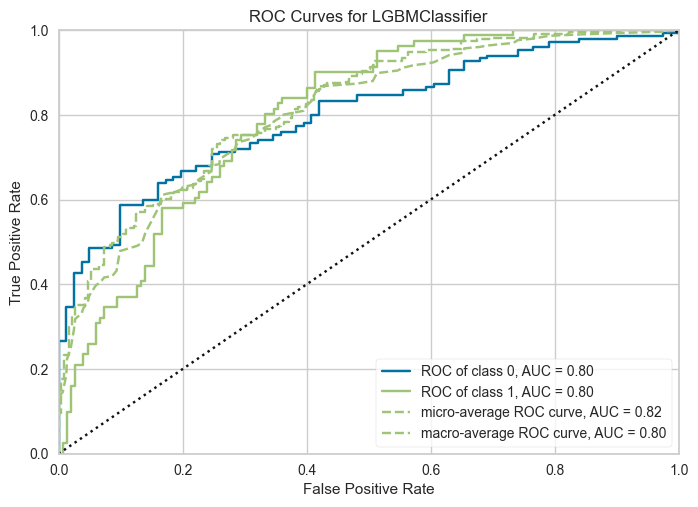

In [17]:
# ROC-AUCを出力して、モデルの性能を確認
from pycaret.classification import plot_model

plot_model(tuned_lgbm)

* ROC曲線(Receiver Operating Characteristic curve): 縦軸にTrue Positive Rate、横軸にFalse Positive Rateを取って、しきい値を0~1で動かしたときの値をプロットしたもの。
* AUC(Area Under Curve): ROC曲線の下側の面積。1に近いほど予測精度が高い

上記グラフはAUCがおよそ0.8で高く見えるが、正例の割合が少ない不均衡データの場合にはFalse Positive Rate($FP/ (FP + TN)$)が上がりにくく、AUCが小さくなりにくい

例えば、100010件のデータの10件が正例正例のとき、False Positive Rateの分母であるFP + TNが10000と大きいので、False Positive Rateが小さくなる

このような場合はPR-AUCを確認する
* PR(Precision-Recall)曲線: ROCではなく、PrecisionとRecallを用いる
* True Negativeが計算に含まれないためランダム予測で0.5にならない

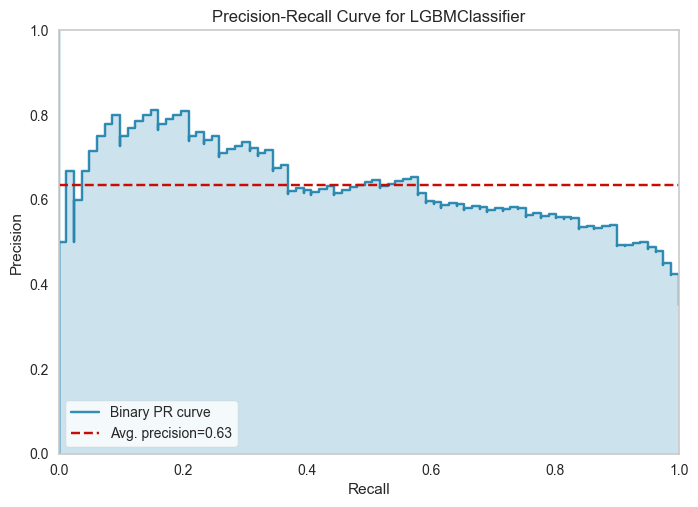

In [18]:
# PR-AUC
plot_model(tuned_lgbm, plot="pr")

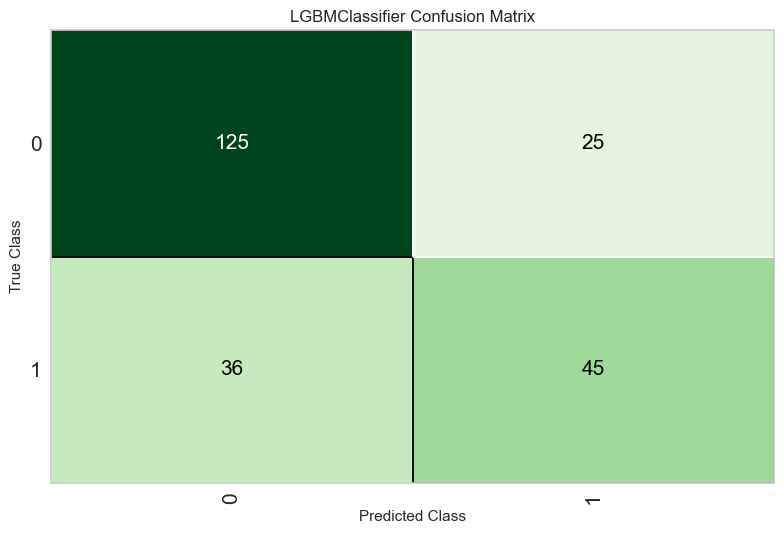

In [19]:
# 混合行列 confusion matrix
plot_model(tuned_lgbm, plot="confusion_matrix")

#### Step 5 モデルの解釈

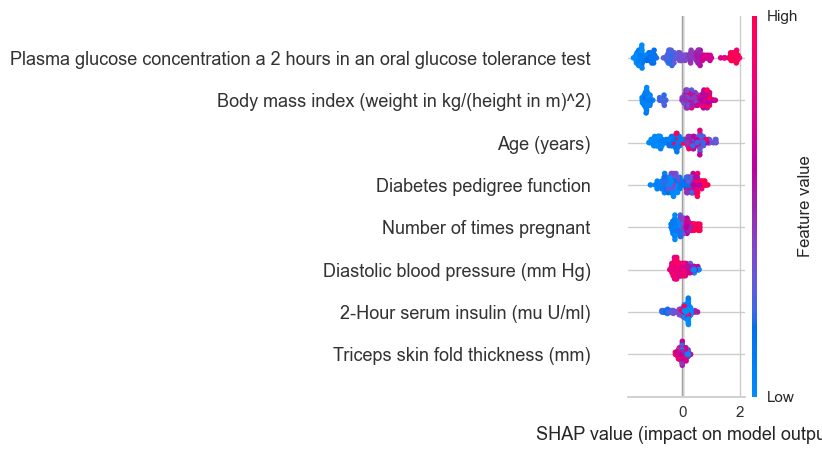

In [20]:
# SHAP
from pycaret.classification import interpret_model

interpret_model(tuned_lgbm)

In [21]:
interpret_model(tuned_lgbm, plot="reason", observation=1)

近年LLMを活用した自動機械学習の手法が発展している

## 4.5 説明可能なAI

機械学習ののモデルを説明可能にするのに重要な要素
* モデルの単純化
* 具体例で説明
* 変数重要度の説明
* 局所的説明: 個別事例において何が寄与しているか
* 決定木は説明しやすい
* SHAP

## 4.6 機械学習のダッシュボード化

1. streamlit: GUIで分析する
2. Explainerdashboard: 分析結果を一覧化。パラメータの微調整を簡単にする

In [22]:
from pycaret.classification import create_model, setup, tune_model
from pycaret.datasets import get_data

data = get_data("diabetes")
reg1 = setup(data, target="Class variable", session_id=1)
lgbm = create_model("lightgbm")
tuned_lgbm = tune_model(lgbm, n_iter=3, optimize="F1")


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Description,Value
0,Session id,1
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7222,0.8060,0.3684,0.7000,0.4828,0.3170,0.3476
1,0.7407,0.8015,0.4737,0.6923,0.5625,0.3874,0.4014
2,0.7037,0.8015,0.6316,0.5714,0.6000,0.3656,0.3668
3,0.7778,0.8556,0.6842,0.6842,0.6842,0.5128,0.5128
4,0.7593,0.7865,0.5789,0.6875,0.6286,0.4524,0.4561
5,0.7037,0.7564,0.5789,0.5789,0.5789,0.3504,0.3504
6,0.6667,0.7459,0.4211,0.5333,0.4706,0.2322,0.2357
7,0.8113,0.8254,0.7222,0.7222,0.7222,0.5794,0.5794
8,0.6981,0.7857,0.6111,0.5500,0.5789,0.3447,0.3458


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7037,0.8496,0.4211,0.6154,0.5000,0.2998,0.3107
1,0.7963,0.8180,0.6316,0.7500,0.6857,0.5367,0.5410
2,0.7963,0.8647,0.6842,0.7222,0.7027,0.5479,0.5484
3,0.7963,0.8511,0.7368,0.7000,0.7179,0.5587,0.5591
4,0.7778,0.8075,0.6316,0.7059,0.6667,0.5008,0.5025
5,0.7222,0.7774,0.5789,0.6111,0.5946,0.3836,0.3839
6,0.7037,0.7564,0.5263,0.5882,0.5556,0.3344,0.3355
7,0.7736,0.8619,0.6667,0.6667,0.6667,0.4952,0.4952
8,0.7547,0.7952,0.6667,0.6316,0.6486,0.4605,0.4609


Fitting 10 folds for each of 3 candidates, totalling 30 fits


In [23]:
from pycaret.classification import dashboard

# Explainerdashboardを表示
dashboard(lgbm, display_format="inline")

Note: model_output=='probability'. For LGBMClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...
Building ExplainerDashboard..
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr a